# <u> Data Analytics & Big Data Capstone Project</u>

## *Online Shoppers Purchasing Intention*

#### This dataset was procured from the UCI Machine Learning Repository.  It consists of feature vectors belonging to 12,330 user sessions. The dataset was created in such a way that each session would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

#### <u> Citation request: </u> Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018).
##### *Web link:* https://doi.org/10.1007/s00521-018-3523-0

In [1]:
##Import libraries

import time #to measure the training times

#Numpy,Pandas, Scipy, Math, and matplotlib
import numpy as np
import pandas as pd
import pandas_profiling
#import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('TkAgg')

#Data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

#Estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

#Model metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score

#Cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#Pickle (to save the models)
from pickle import dump
from pickle import load

In [2]:
#ignore Future Warnings (such as deprecation warnings)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

### Online Shoppers Purchasing Intention Dataset
#### <u>Please note:</u> *The data will be imported directly from the UCI Machine Learning Repository.*

In [3]:
# Load the data
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv'
rawData = pd.read_csv(data_url)
print('Number of records: ', len(rawData.index))
print('Number of Features: ', len(rawData.columns))
rawData.head()

Number of records:  12330
Number of Features:  18


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### *Exploratory Data Analysis (EDA)*

Visualize the data in different ways, to familiarize with the variables distributions, summary statistics, and also to perform a quick visual analysis of the data distribution among the different variables, and detect potential correlations.

In [4]:
#Perform the EDA using pandas profiling
t0 = time.time() #begin time keeper variable

profile = pandas_profiling.ProfileReport(rawData)

ttr = time.time() - t0 #ttr stands for "time to run"
print("(It takes: %.2f seconds to create the Pandas Profiling Report)\n" % ttr)

profile

(It takes: 5.01 seconds to create the Pandas Profiling Report)



Number of variables,18
Number of observations,12330
Total Missing (%),0.0%
Total size in memory,1.5 MiB
Average record size in memory,130.0 B
Numeric,13
Categorical,2
Boolean,2
Date,0
Text (Unique),0
Rejected,1


### Additional EDA
Additional charts are created in order to get insights on several categorical features.

#### Visit to page types vs Revenue

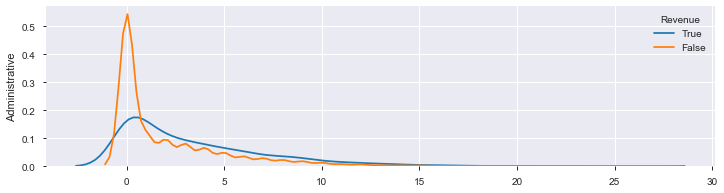

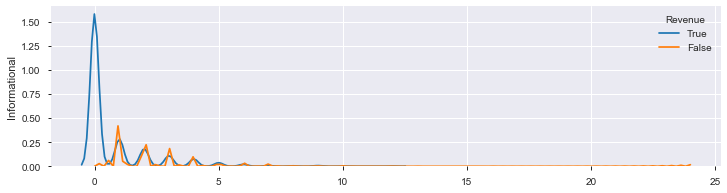

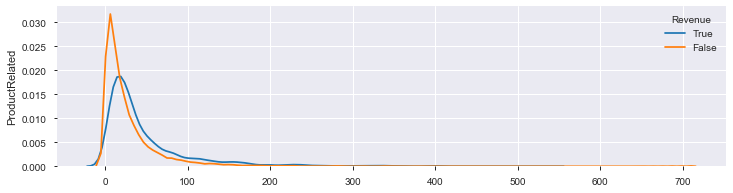

In [5]:
plt.figure(figsize=(12,10))

%matplotlib inline

# Administrative pages visits vs Revenue
plt.figure(figsize=(12,10))
ax1 = plt.subplot(311)
sns.kdeplot(rawData[rawData.Revenue == True].Administrative)
sns.kdeplot(rawData[rawData.Revenue == False].Administrative)
plt.ylabel('Administrative')
plt.legend(title='Revenue', loc='upper right', labels=['True', 'False'])

# Informational pages visits vs Revenue
plt.figure(figsize=(12,10))
ax2 = plt.subplot(312)
sns.kdeplot(rawData[rawData.Revenue == True].Informational)
sns.kdeplot(rawData[rawData.Revenue == False].Informational)
plt.ylabel('Informational')
plt.legend(title='Revenue', loc='upper right', labels=['True', 'False'])

# ProductRelated pages visits vs Revenue
plt.figure(figsize=(12,10))
ax3 = plt.subplot(313)
sns.kdeplot(rawData[rawData.Revenue == True].ProductRelated)
sns.kdeplot(rawData[rawData.Revenue == False].ProductRelated)
plt.ylabel('ProductRelated')
plt.legend(title='Revenue', loc='upper right', labels=['True', 'False'])


#### SpecialDay vs Revenue

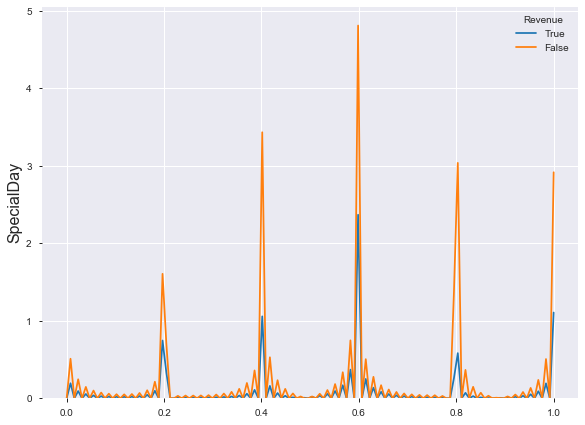

In [6]:
# Special Day closeness (in days)  vs Revenue

plt.figure(figsize=(9.6,7.2))
sns.kdeplot(rawData[rawData.Revenue == True].SpecialDay)
sns.kdeplot(rawData[rawData.Revenue == False].SpecialDay)
plt.ylabel('SpecialDay', size = 16)
plt.legend(title='Revenue', loc='upper right', labels=['True', 'False'])

#### Month vs Revenue

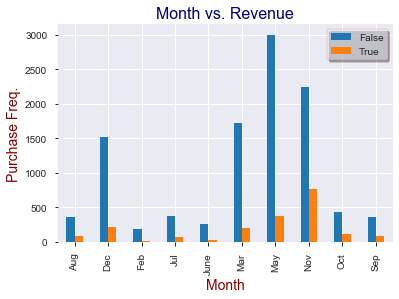

In [7]:
crossT = pd.crosstab(rawData.Month,rawData.Revenue)
crossT.plot.bar()
plt.xlabel('Month', size= 14, color= 'darkred')
plt.ylabel('Purchase Freq.', size= 14, color= 'darkred')
plt.title('Month vs. Revenue', size= 16, color='navy')
plt.legend(frameon=True, shadow=True, framealpha=0.5, edgecolor = 'red')
plt.grid(color='white')


<u>Observations</u>:

* January and April are non-existent values; very unusual behavior.

* Most customers visited the website in the months of May and November.

* Highest number of purchases have been made in the months of November and May.

* Lowest visits and purchases are in the months of June and February.

#### Visitor Type vs Revenue

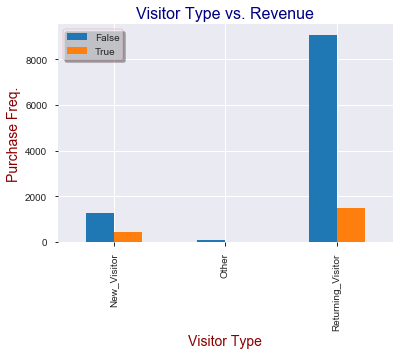

In [8]:
crossT1 = pd.crosstab(rawData.VisitorType,rawData.Revenue)
crossT1.plot.bar()
plt.xlabel('Visitor Type', size= 14, color= 'darkred')
plt.ylabel('Purchase Freq.', size= 14, color= 'darkred')
plt.title('Visitor Type vs. Revenue', size= 16, color='navy')
plt.legend(frameon=True, shadow=True, framealpha=0.5, edgecolor = 'red')


<u>Observations</u>:

* Returning customers are the ones who visit the website the most.

* Most returning customers do not complete a purchase.

#### Weekend vs Revenue

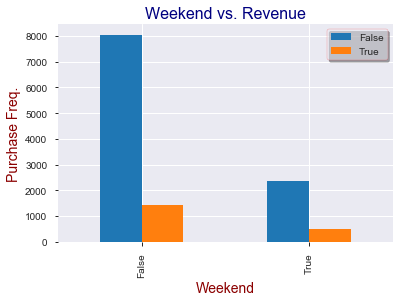

In [9]:
crossT2 = pd.crosstab(rawData.Weekend,rawData.Revenue)
crossT2.plot.bar()
plt.xlabel('Weekend', size= 14, color= 'darkred')
plt.ylabel('Purchase Freq.', size= 14, color= 'darkred')
plt.title('Weekend vs. Revenue', size= 16, color='navy')
plt.legend(frameon=True, shadow=True, framealpha=0.5, edgecolor = 'red')


<u>Observations</u>:

* The vast majority of the website visits occurr during weekdays.

* Most purchases occurr during weekdays as well.

In [10]:
#Double check for missing values
rawData.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

#### As shown in the Pandas Profiling Report, the dataset consists of 10 numerical and 8 categorical attributes, with 12,330 examples. There are no missing values in the dataset.

From the cited article, the description and meaning of the features are as follows:

#### <u> Numerical Features:

| | Feature name |Feature description|
| :-: | :- | :- |
|1.|Administrative|Number of pages visited by the visitor about account management|
|2.|Administrative_Duration | Total amount of time (in seconds) spent by the visitor on account management related pages|
|3.|Informational |Number of pages visited by the visitor about Website, communication and address information of the shopping site|
|4.|Informational_Duration | Total amount of time (in seconds) spent by the visitor on informational pages|
|5.|ProductRelated|Number of pages visited by visitor about product related pages|
|6.|ProductRelated_Duration|Total amount of time (in seconds) spent by the visitor on product related pages|
|7.|BounceRates|Average bounce rate value of the pages visited by the visitor|
|8.|ExitRates|Average exit rate value of the pages visited by the visitor|
|9.|PageValues|Average page value of the pages visited by the visitor|
|10.|SpecialDay|Closeness of the site visiting time to a special day|

The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 
* The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.
* The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.
* The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.
* The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction.
*The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentine’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.

#### <u> Categorical Features:

|| Feature name |Feature description |
|:-:| :- | :- |
|1|Month|Month value of the visit date|
|2|Operating Systems|Operating system of the visitor|
|3| Browser | Browser of the visitor|
|4|Region|Geographic region from which the session has been started by the visitor|
|5|TrafficType | Traffic source by which the visitor has arrived at the Web site (e.g., banner, SMS, direct)|
|6| VisitorType| Visitor type as “New Visitor,” “Returning Visitor,” and “Other”|
|7|Weekend|Boolean value indicating whether the date of the visit is weekend|
|T*|Revenue|Class label indicating whether the visit has been finalized with a transaction|

`*The 'Revenue' attribute will be used as the Target.`



### *Data Pre-processing*

As part of the pre-processing activities, we need to convert the variables that were initially read as numerical to categorical:

In [11]:
#Convert categorical variables to their appropriate data type
rawData.OperatingSystems = rawData.OperatingSystems.astype('category')
rawData.Browser = rawData.Browser.astype('category')
rawData.Region = rawData.Region.astype('category')
rawData.TrafficType = rawData.TrafficType.astype('category')

In [12]:
#Verify the new dataset data types
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null category
Browser                    12330 non-null category
Region                     12330 non-null category
TrafficType                12330 non-null category
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
d

#### Multicollinearities

Next, multicollinearities will be identified and evaluated, using a correlation matrix.  During the EDA, the profile report identified *ExitRates* and *BounceRates* to be highly correlated.  However, a further quantitative evaluation will be made:

In [13]:
# Address collinearities using correlation analysis, with higher granularity

corrMat = rawData.corr()
corrMat.to_csv(r'C:\Alejandro\Big Data & Data Analytics\Course 5 - Python\CAPSTONE PROJECT\CorrMat.csv', index = False)
print(corrMat)

                         Administrative  Administrative_Duration  \
Administrative                 1.000000                 0.601583   
Administrative_Duration        0.601583                 1.000000   
Informational                  0.376850                 0.302710   
Informational_Duration         0.255848                 0.238031   
ProductRelated                 0.431119                 0.289087   
ProductRelated_Duration        0.373939                 0.355422   
BounceRates                   -0.223563                -0.144170   
ExitRates                     -0.316483                -0.205798   
PageValues                     0.098990                 0.067608   
SpecialDay                    -0.094778                -0.073304   
Weekend                        0.026417                 0.014990   
Revenue                        0.138917                 0.093587   

                         Informational  Informational_Duration  \
Administrative                0.376850           

In [14]:
#Plot the correlation matrix in a heatmap style
CorrMatHeatMap = corrMat.style.background_gradient(cmap='RdBu_r').set_precision(3)
CorrMatHeatMap

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Revenue
Administrative,1,0.602,0.377,0.256,0.431,0.374,-0.224,-0.316,0.099,-0.0948,0.0264,0.139
Administrative_Duration,0.602,1,0.303,0.238,0.289,0.355,-0.144,-0.206,0.0676,-0.0733,0.015,0.0936
Informational,0.377,0.303,1,0.619,0.374,0.388,-0.116,-0.164,0.0486,-0.0482,0.0358,0.0952
Informational_Duration,0.256,0.238,0.619,1,0.28,0.347,-0.0741,-0.105,0.0309,-0.0306,0.0241,0.0703
ProductRelated,0.431,0.289,0.374,0.28,1,0.861,-0.205,-0.293,0.0563,-0.024,0.0161,0.159
ProductRelated_Duration,0.374,0.355,0.388,0.347,0.861,1,-0.185,-0.252,0.0528,-0.0364,0.00731,0.152
BounceRates,-0.224,-0.144,-0.116,-0.0741,-0.205,-0.185,1,0.913,-0.119,0.0727,-0.0465,-0.151
ExitRates,-0.316,-0.206,-0.164,-0.105,-0.293,-0.252,0.913,1,-0.174,0.102,-0.0626,-0.207
PageValues,0.099,0.0676,0.0486,0.0309,0.0563,0.0528,-0.119,-0.174,1,-0.0635,0.012,0.493
SpecialDay,-0.0948,-0.0733,-0.0482,-0.0306,-0.024,-0.0364,0.0727,0.102,-0.0635,1,-0.0168,-0.0823


##### After analyzing the correlation matrix, additional to the collinearity identified by Pandas Profiling, it seems as if *ProductRelated_Duration* and *ProductRelated* might present collinearity (correlation of 0.861).

Histograms of both variables are created, in order to assess data distribution.  In terms of correlation to the target variable, ProductRelated has a slightly higher correlation (0.159) than ProductRelated_Duration (0.152).  Thus, additional factors will be considered to determine which of the two variables to drop from the dataset.

Text(0.5, 1.0, 'ProductRelated_Duration Histogram')

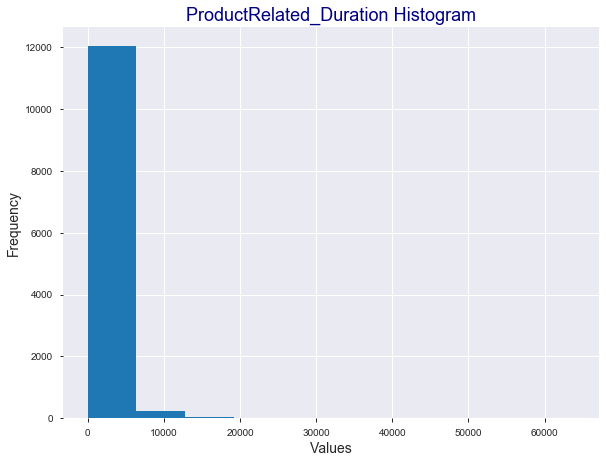

In [15]:
#Create a more detailed Histogram for ProductRelated_Duration, to assess value distribution.

plt.figure(figsize=(9.6,7.2))
plt.hist(rawData['ProductRelated_Duration'])
plt.xlabel('Values', size= 14)
plt.ylabel('Frequency', size= 14)
plt.title('ProductRelated_Duration Histogram', size= 18, color='navy')

Text(0.5, 1.0, 'ProductRelated Histogram')

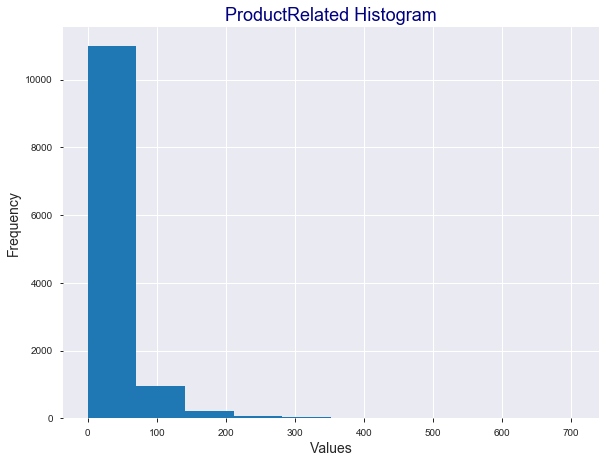

In [16]:
#Create a more detailed Histogram for ProductRelated_Duration, to assess value distribution.

plt.figure(figsize=(9.6,7.2))
plt.hist(rawData['ProductRelated'])
plt.xlabel('Values', size= 14)
plt.ylabel('Frequency', size= 14)
plt.title('ProductRelated Histogram', size= 18, color='navy')


The amount of zeroes on the data distribution for ProductRelated_Duration is far greater than those of ProductRelated.  Therefore, we proceed to quantify the actual values distribution, to understand exactly how much.

In [17]:
##Check for the values in each Product Related Variable

print('*************************************',
      '\nValues for ProductRelated_Duration',
     '\n*************************************\n')
#Check the values in ProductRelated_Duration
print( rawData['ProductRelated_Duration'].value_counts())

print('\n******************************',
      '\nValues for ProductRelated',
     '\n******************************\n')
#Check the values in ProductRelated_Duration
print(rawData['ProductRelated'].value_counts())

************************************* 
Values for ProductRelated_Duration 
*************************************

0.000000       755
17.000000       21
8.000000        17
11.000000       17
15.000000       16
              ... 
6560.007540      1
821.893333       1
2004.500000      1
266.500000       1
1919.550000      1
Name: ProductRelated_Duration, Length: 9551, dtype: int64

****************************** 
Values for ProductRelated 
******************************

1      622
2      465
3      458
4      404
6      396
      ... 
377      1
385      1
292      1
409      1
339      1
Name: ProductRelated, Length: 311, dtype: int64


Given that the zeroes on ProductRelated_Duration is far greater than those of ProductRelated (755 vs none), and the correlation with the target variable (Revenue) is greater on the ProductRelated feature, ProductRelated_Duration gets dropped from the dataset.

In [18]:
# Drop collinear features: BounceRates (as ExitRates has a higher correlation with Revenue), 
# and ProductRelated_Duration (based on zeroes and target variable correlation).
CleanData = rawData.drop(['BounceRates', 'ProductRelated_Duration'], axis=1)

In [19]:
#Check that the features were successfully dropped.
CleanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 16 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null category
Browser                    12330 non-null category
Region                     12330 non-null category
TrafficType                12330 non-null category
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(2), category(4), float64(5), int64(3), object(2)
memory usage: 1.0+ MB


#### Data segmentation
The next step will be to segment the data into numerical variables, categorical variables, and the target variable, for individual pre-processing of numerical and categorical data types.

In [20]:
# Extract the numerical features into a separate dataset, for further processing

NumFeat=CleanData.loc[:,['Administrative','Administrative_Duration','Informational','Informational_Duration',
                         'ProductRelated','ExitRates','PageValues','SpecialDay']]
print('********************',
      '\nNumerical Features',
     '\n********************\n')
NumFeat.head()

******************** 
Numerical Features 
********************



,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ExitRates,PageValues,SpecialDay
0,0,0.0,0,0.0,1,0.20,0.0,0.0
1,0,0.0,0,0.0,2,0.10,0.0,0.0
2,0,0.0,0,0.0,1,0.20,0.0,0.0
3,0,0.0,0,0.0,2,0.14,0.0,0.0
4,0,0.0,0,0.0,10,0.05,0.0,0.0


In [21]:
# Extract the categorical features into a separate dataset, for further processing

CatFeat=CleanData.loc[:,['Month','OperatingSystems','Browser','Region',
                         'TrafficType','VisitorType','Weekend']]
print('**********************',
      '\nCategorical Features',
     '\n**********************\n')
CatFeat.head()

********************** 
Categorical Features 
**********************



,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,Feb,1,1,1,1,Returning_Visitor,False
1,Feb,2,2,1,2,Returning_Visitor,False
2,Feb,4,1,9,3,Returning_Visitor,False
3,Feb,3,2,2,4,Returning_Visitor,False
4,Feb,3,3,1,4,Returning_Visitor,True


In [22]:
# Define the target variable

Target=CleanData.loc[:,['Revenue']]
print('********************',
      '\nResponse Variable',
     '\n********************\n')
Target.head()

******************** 
Response Variable 
********************



,Revenue
0,False
1,False
2,False
3,False
4,False


#### Numerical data pre-processing

The numerical features have widely varying ranges.  For example:

| Feature | Min | Max |
|:-:|:-:|:-:|
| Administrative | 0 | 27 |
| Administrative_Duration | 0 | 3398.8 |

Therefore, in order to avoid issues with the models, they will be  standardized.

In [23]:
NumFeat.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ExitRates', 'PageValues',
       'SpecialDay'],
      dtype='object')

In [24]:
# Standardize the numerical features

scaler = StandardScaler()
StdNumFeat = scaler.fit_transform(NumFeat)
StdNumFeat= pd.DataFrame(StdNumFeat)
StdNumFeat.columns = ['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ExitRates', 'PageValues',
       'SpecialDay']
print('\n Standardized Numerical Features',
     '\n**********************************')
StdNumFeat.head()


 Standardized Numerical Features 
**********************************


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ExitRates,PageValues,SpecialDay
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,3.229316,-0.317178,-0.308821
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,1.171473,-0.317178,-0.308821
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,3.229316,-0.317178,-0.308821
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,1.994610,-0.317178,-0.308821
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,0.142551,-0.317178,-0.308821


#### Categorical data pre-processing

In order for most models to be able to work, they need numerical data as inputs only.  Therefore, categorical variables will be one-hot encoded, so that the algorithms can process them.

In [25]:
##ONE HOT ENCODING

#Dummify the categorical data
DumData = pd.get_dummies(CatFeat)
print('\nOne-hot-encoded Categorical Features\n')
DumData.info()


One-hot-encoded Categorical Features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 64 columns):
Weekend                          12330 non-null bool
Month_Aug                        12330 non-null uint8
Month_Dec                        12330 non-null uint8
Month_Feb                        12330 non-null uint8
Month_Jul                        12330 non-null uint8
Month_June                       12330 non-null uint8
Month_Mar                        12330 non-null uint8
Month_May                        12330 non-null uint8
Month_Nov                        12330 non-null uint8
Month_Oct                        12330 non-null uint8
Month_Sep                        12330 non-null uint8
OperatingSystems_1               12330 non-null uint8
OperatingSystems_2               12330 non-null uint8
OperatingSystems_3               12330 non-null uint8
OperatingSystems_4               12330 non-null uint8
OperatingSystems_5               12330 non-

#### Concatenate all the three datasets ( standardized numerical, dummified categorical, and target) into one.

Put together the full working dataframe by concatenating the standardized numerical features, the dummified categorical features, and the response variable 'Revenue'.

In [26]:
data = pd.concat([StdNumFeat, DumData, Target], axis=1)
print('*******************',
      '\n Cleaned Dataframe',
     '\n*******************')
data.head()

******************* 
 Cleaned Dataframe 
*******************


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ExitRates,PageValues,SpecialDay,Weekend,Month_Aug,...,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Revenue
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,3.229316,-0.317178,-0.308821,False,0,...,0,0,0,0,0,0,0,0,1,False
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,1.171473,-0.317178,-0.308821,False,0,...,0,0,0,0,0,0,0,0,1,False
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,3.229316,-0.317178,-0.308821,False,0,...,0,0,0,0,0,0,0,0,1,False
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,1.994610,-0.317178,-0.308821,False,0,...,0,0,0,0,0,0,0,0,1,False
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,0.142551,-0.317178,-0.308821,True,0,...,0,0,0,0,0,0,0,0,1,False


In [27]:
#Check the new data structure

print('****************************',
      '\n Cleaned Dataframe Structure',
     '\n****************************\n')
data.info()

**************************** 
 Cleaned Dataframe Structure 
****************************

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 73 columns):
Administrative                   12330 non-null float64
Administrative_Duration          12330 non-null float64
Informational                    12330 non-null float64
Informational_Duration           12330 non-null float64
ProductRelated                   12330 non-null float64
ExitRates                        12330 non-null float64
PageValues                       12330 non-null float64
SpecialDay                       12330 non-null float64
Weekend                          12330 non-null bool
Month_Aug                        12330 non-null uint8
Month_Dec                        12330 non-null uint8
Month_Feb                        12330 non-null uint8
Month_Jul                        12330 non-null uint8
Month_June                       12330 non-null uint8
Month_Mar                     

In [28]:
#Select the independent variables (features or predictors)
Features = data.iloc[:,0:-1]
print('\n****************************',
      '\n Sample of cleaned Features',
     '\n****************************')
Features.head(10)


**************************** 
 Sample of cleaned Features 
****************************


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ExitRates,PageValues,SpecialDay,Weekend,Month_Aug,...,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,3.229316,-0.317178,-0.308821,False,0,...,0,0,0,0,0,0,0,0,0,1
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,1.171473,-0.317178,-0.308821,False,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,3.229316,-0.317178,-0.308821,False,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,1.994610,-0.317178,-0.308821,False,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,0.142551,-0.317178,-0.308821,True,0,...,0,0,0,0,0,0,0,0,0,1
5,-0.696993,-0.457191,-0.396478,-0.244931,-0.286270,-0.380935,-0.317178,-0.308821,False,0,...,0,0,0,0,0,0,0,0,0,1
6,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,3.229316,-0.317178,1.702146,False,0,...,0,0,0,0,0,0,0,0,0,1
7,-0.395938,-0.457191,-0.396478,-0.244931,-0.713488,3.229316,-0.317178,-0.308821,True,0,...,0,0,0,0,0,0,0,0,0,1
8,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,1.171473,-0.317178,3.713114,False,0,...,0,0,0,0,0,0,0,0,0,1
9,-0.696993,-0.457191,-0.396478,-0.244931,-0.646033,-0.429072,-0.317178,1.702146,False,0,...,0,0,0,0,0,0,0,0,0,1


### *Feature Engineering*

In an attempt to avoid a longer training times, and avoid overfitting, Recursive Feature Elimination will be performed to keep only the best subset of predictors.

In [29]:
#Identify the best predictors, selected by the RFE algorithm.
model = LogisticRegression(solver='liblinear', random_state=14)
rfe = RFE(model)
rfeM = rfe.fit(Features, Target.values.ravel()) #use the .ravel() function as suggested by warning
print("Number of Features: %d" % rfeM.n_features_)
print("\nSelected Features: %s" % rfeM.support_)
print("\nFeature Ranking: %s" % rfeM.ranking_)

Number of Features: 36

Selected Features: [False False False False  True  True  True False False False  True  True
 False  True  True  True  True False False  True False  True  True False
  True  True False False False  True False False  True False False False
 False False  True False False  True False False  True False False False
  True  True False  True False False  True False  True False  True  True
 False  True  True  True  True False  True  True  True  True  True  True]

Feature Ranking: [37 36 24 33  1  1  1 31 15 12  1  1  4  1  1  1  1 13 11  1 23  1  1 10
  1  1 34  8  2  1  6 26  1  7 16 29 35 18  1 14 22  1 21 19  1 27 20 28
  1  1 25  1  3 17  1  5  1  9  1  1 30  1  1  1  1 32  1  1  1  1  1  1]


In [30]:
# Create the reduced dataset according to the RFE selected features
redFeat = Features.loc[:,[False, False, False, False,  True,  True,  True, False, False, False,
                          True,  True, False,  True,  True,  True,  True, False, False,  True,
                          False,  True,  True, False,  True,  True, False, False, False,  True,
                          False, False,  True, False, False, False, False, False,  True, False,
                          False,  True, False, False,  True, False, False, False,  True,  True,
                          False,  True, False, False,  True, False,  True, False,  True,  True,
                          False,  True,  True,  True,  True, False,  True,  True,  True,  True,
                          True,  True]]
print('\n Reduced features using RFE',
      '\n*****************************')
redFeat.head(10)


 Reduced features using RFE 
*****************************


,ProductRelated,ExitRates,PageValues,Month_Dec,Month_Feb,Month_June,Month_Mar,Month_May,Month_Nov,OperatingSystems_1,...,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,-0.691003,3.229316,-0.317178,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,-0.668518,1.171473,-0.317178,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,-0.691003,3.229316,-0.317178,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,-0.668518,1.994610,-0.317178,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,-0.488636,0.142551,-0.317178,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,-0.286270,-0.380935,-0.317178,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,-0.691003,3.229316,-0.317178,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,-0.713488,3.229316,-0.317178,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
8,-0.668518,1.171473,-0.317178,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,-0.646033,-0.429072,-0.317178,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
#Check the RFE reduced features dataset

print('\n Reduced features using RFE',
      '\n*****************************')
redFeat.info()


 Reduced features using RFE 
*****************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 36 columns):
ProductRelated                   12330 non-null float64
ExitRates                        12330 non-null float64
PageValues                       12330 non-null float64
Month_Dec                        12330 non-null uint8
Month_Feb                        12330 non-null uint8
Month_June                       12330 non-null uint8
Month_Mar                        12330 non-null uint8
Month_May                        12330 non-null uint8
Month_Nov                        12330 non-null uint8
OperatingSystems_1               12330 non-null uint8
OperatingSystems_3               12330 non-null uint8
OperatingSystems_4               12330 non-null uint8
OperatingSystems_6               12330 non-null uint8
OperatingSystems_7               12330 non-null uint8
Browser_3                        12330 non-null uint8
Browser_6      

### Build Classifier Predictive Models

We will evaluate 5 different classifier algortihms, starting with out of the box modeling, and then tuning the hyperparameters, to see if we can improve the initial performance metrics.  The selected classifier algorithms will be: Random Forest, Gradient Boosting Trees, Logistic Regression, k-Nearest Neighbors (kNN) and Support Vector Machines (SVM).
####  First, we create the training and testing data partitions:

In [32]:
#Create the arrays with the features (X1) and the target (Y) values
X= redFeat.values
Y = Target.values

# Create training (70%) and test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3,random_state=14)

#### Once the data sets are prepared for training the models, we proceed to perform a 10-fold cross-validation on the proposed classifier algorithms, to calculate the expected *out-of-the-box* performance.

In [33]:
# Prepare models and estimate their accuracy

models = []
models.append(('RF', RandomForestClassifier()))
models.append(('GBT', GradientBoostingClassifier()))
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC(gamma='auto')))

print('\nCross-validation Scores for selected algorithms:\n')

# Evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=14)
    cv_results = cross_val_score(model, X_train, y_train.ravel(), cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    res = "%s: %f || %f" % (name, cv_results.mean(), cv_results.std())
    print(res)


Cross-validation Scores for selected algorithms:

RF: 0.890046 || 0.012103
GBT: 0.900474 || 0.009844
LR: 0.885297 || 0.007008
KNN: 0.888078 || 0.004187
SVM: 0.892133 || 0.006682


Text(0, 0.5, 'Accuracy')

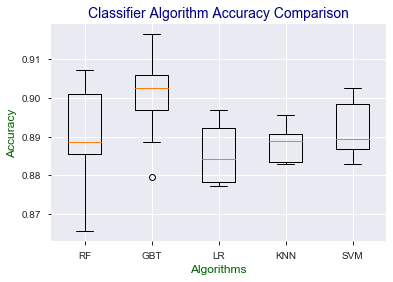

In [34]:
# Compare algorithms using a boxplot chart

plt.boxplot(results, labels=names)
plt.title('Classifier Algorithm Accuracy Comparison', size= 14, color='navy')
plt.xlabel('Algorithms', size= 12, color= 'darkgreen')
plt.ylabel('Accuracy', size= 12, color= 'darkgreen')
#plt.show()

#### According to the cross-validation results of the models, the top three performers based on accuracy are:

| Classifier algorithm | Accuracy |
|:-| :-: |
|Gradient Boosting Trees|0.900474|
|Random Forest|0.895376|
|Support Vector Machines|0.892133|

Therefore, these three classification models will be tuned to select the best performing model.

### <u>Model Tuning</u>:

#### For the first classifier, Stochastic Gradient Boosting Trees, a tunegrid will be used to try five different number of trees (50, 100, 150, 200, and 250), and three different learning rates (0.001, 0.01, and 0.1).

In [35]:
#Define the 10-fold cross-validation parameter to use in all subsequent models.
kfold = KFold(n_splits=10, random_state=14)

# Stochastic Gradient Boosting Classification tuning


t0 = time.time() #Start the time-keeper variable

GBTtune_grid = dict(n_estimators=np.array([50,100,150,200,250]),learning_rate=np.array([0.001, 0.01, 0.1]))
tGBTmodel = GradientBoostingClassifier(random_state=14)
gbt_cv = GridSearchCV(estimator=tGBTmodel, param_grid=GBTtune_grid, scoring='accuracy', cv=kfold)
tGBTresult = gbt_cv.fit(X_train, y_train.ravel())

ttt = time.time() - t0 #ttt stands for "time to train"

#Save the fitted model to disk
cvGBTfilename = 'cvGBTmodel.sav'
dump(gbt_cv, open(cvGBTfilename, 'wb'))
print("\n*** The fitted model has been successfully saved as %s ***" % cvGBTfilename)

print("It takes: %.2f seconds for GBT Classifier tuning" % ttt)
print("\nBest accuracy: %f using %s \n" % (tGBTresult.best_score_, tGBTresult.best_params_))
means = tGBTresult.cv_results_['mean_test_score']
stds = tGBTresult.cv_results_['std_test_score']
params = tGBTresult.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


*** The fitted model has been successfully saved as cvGBTmodel.sav ***
It takes: 178.86 seconds for GBT Classifier tuning

Best accuracy: 0.901981 using {'learning_rate': 0.01, 'n_estimators': 250} 

0.843935 (0.011166) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.843935 (0.011166) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.843935 (0.011166) with: {'learning_rate': 0.001, 'n_estimators': 150}
0.843935 (0.011166) with: {'learning_rate': 0.001, 'n_estimators': 200}
0.843935 (0.011166) with: {'learning_rate': 0.001, 'n_estimators': 250}
0.843935 (0.011166) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.886688 (0.008773) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.897463 (0.009208) with: {'learning_rate': 0.01, 'n_estimators': 150}
0.900012 (0.010851) with: {'learning_rate': 0.01, 'n_estimators': 200}
0.901981 (0.009702) with: {'learning_rate': 0.01, 'n_estimators': 250}
0.900823 (0.009691) with: {'learning_rate': 0.1, 'n_estimators': 50}
0.900475 (0.00972

#### For the second classifier, Random Forest, a tunegrid will be used to try 10 different number of trees (from 50 to 500, in steps of 50), and two max_features methods ('auto' and 'sqrt').

In [36]:
## Set the RF parameter tuning grid

#**********************
from pprint import pprint # import Data pretty printer library
#**********************

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features}

pprint(random_grid) #print the generated random_grid

{'max_features': ['auto', 'sqrt'],
 'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]}


In [37]:
# Random Forest Classification tuning

t0 = time.time() #Start the time-keeper variable

tRFmodel = RandomForestClassifier(random_state=14)

RF_cv = GridSearchCV(estimator=tRFmodel, param_grid=random_grid, scoring='accuracy', cv=kfold)
tRFresult = RF_cv.fit(X_train, y_train.ravel())

ttt = time.time() - t0 #ttt stands for "time to train"

#Save the fitted model to disk
cvRFfilename = 'cvRFmodel.sav'
dump(RF_cv, open(cvRFfilename, 'wb'))
print("\n*** The fitted model has been successfully saved as %s ***" % cvRFfilename)

print("It takes: %.2f seconds for the Random Forest Classifier tuning" % ttt)
print("\nBest accuracy: %f using %s \n" % (tRFresult.best_score_, tRFresult.best_params_))
means = tRFresult.cv_results_['mean_test_score']
stds = tRFresult.cv_results_['std_test_score']
params = tRFresult.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


*** The fitted model has been successfully saved as cvRFmodel.sav ***
It takes: 315.16 seconds for the Random Forest Classifier tuning

Best accuracy: 0.899316 using {'max_features': 'auto', 'n_estimators': 300} 

0.897115 (0.009049) with: {'max_features': 'auto', 'n_estimators': 50}
0.898274 (0.009468) with: {'max_features': 'auto', 'n_estimators': 100}
0.897926 (0.008790) with: {'max_features': 'auto', 'n_estimators': 150}
0.898621 (0.008954) with: {'max_features': 'auto', 'n_estimators': 200}
0.898274 (0.008295) with: {'max_features': 'auto', 'n_estimators': 250}
0.899316 (0.008450) with: {'max_features': 'auto', 'n_estimators': 300}
0.898390 (0.007896) with: {'max_features': 'auto', 'n_estimators': 350}
0.897694 (0.008410) with: {'max_features': 'auto', 'n_estimators': 400}
0.897810 (0.008436) with: {'max_features': 'auto', 'n_estimators': 450}
0.898390 (0.007764) with: {'max_features': 'auto', 'n_estimators': 500}
0.897115 (0.009049) with: {'max_features': 'sqrt', 'n_estimators':

#### For the third classifier, Support Vector Machines, a tunegrid will be used to try five different values of C 1, 10, 50, 100, 200), and two *gamma* values (0.1 and 0.01).

In [38]:
# SVM Algorithm tuning

t0 = time.time() #Start the time-keeper variable

# Specify the hyperparameter space
SVMtune_grid = {'C':[1, 10, 50, 100, 200],
              'gamma':[0.1, 0.01]}
tSVMmodel= SVC()

svc_cv= GridSearchCV(estimator=tSVMmodel, param_grid=SVMtune_grid, scoring='accuracy', cv=kfold)
tSVMresult = svc_cv.fit(X_train, y_train.ravel())

ttt = time.time() - t0 #ttt stands for "time to train"

#Save the fitted model to disk
cvSVMfilename = 'cvSVMmodel.sav'
dump(svc_cv, open(cvSVMfilename, 'wb'))
print("\n*** The fitted model has been successfully saved as %s ***" % cvSVMfilename)

print("It takes: %.2f seconds for SVM Algorithm tuning" % ttt)
print("Best accuracy %f using %s \n" % (tSVMresult.best_score_, tSVMresult.best_params_))
means = tSVMresult.cv_results_['mean_test_score']
stds = tSVMresult.cv_results_['std_test_score']
params = tSVMresult.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


*** The fitted model has been successfully saved as cvSVMmodel.sav ***
It takes: 174.94 seconds for SVM Algorithm tuning
Best accuracy 0.897810 using {'C': 200, 'gamma': 0.01} 

0.896652 (0.010088) with: {'C': 1, 'gamma': 0.1}
0.888078 (0.006764) with: {'C': 1, 'gamma': 0.01}
0.896420 (0.011305) with: {'C': 10, 'gamma': 0.1}
0.892828 (0.007818) with: {'C': 10, 'gamma': 0.01}
0.897115 (0.009650) with: {'C': 50, 'gamma': 0.1}
0.895493 (0.009268) with: {'C': 50, 'gamma': 0.01}
0.895030 (0.010450) with: {'C': 100, 'gamma': 0.1}
0.896999 (0.010626) with: {'C': 100, 'gamma': 0.01}
0.893407 (0.010248) with: {'C': 200, 'gamma': 0.1}
0.897810 (0.011028) with: {'C': 200, 'gamma': 0.01}


#### The results for the tuned classifiers are:
| Classifier algorithm | Accuracy |
|:-| :-: |
|Gradient Boosting Trees|0.901981|
|Random Forest|0.899316 |
|Support Vector Machines|0.897810|

These results will be plotted using boxplots, to analyze the variability of the results and any potential outliers.

Text(0.5, 1.0, 'Tuned Classifier Algorithm Comparison')

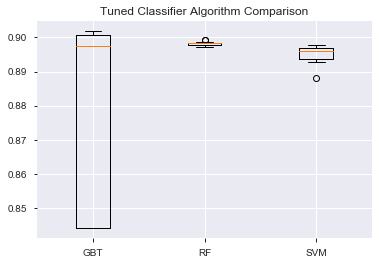

In [39]:
# Compare tuned algorithms using a boxplot chart

TunedRes = [tGBTresult.cv_results_['mean_test_score'], tRFresult.cv_results_['mean_test_score'],
           tSVMresult.cv_results_['mean_test_score']]
Tnames = ['GBT', 'RF', 'SVM']


plt.boxplot(TunedRes, labels=Tnames)
plt.title('Tuned Classifier Algorithm Comparison')
#plt.show()

From the previous chart, it is noted that, although the highest accuracy score was obtained by the Gradient Boosting Trees algorithm, the variance in the values for GBT is the widest of the three classifiers.  It ranges from just over ~0.84 to ~0.90, while the least variability is presented by the Random Forest classifier -so tight, that the quantiles show almost as a single line in the boxplot.
Since Random Forest had the second best accuracy score, but the variance in the accuracy values is so low, this will be the selected classifier, up to this point.


### Model evaluation using the tuned parameters

#### Stochastic Gradient Boosting Classification 

The best results were obtained using: {'learning_rate': 0.01, 'n_estimators': 250}

In [40]:
# Predict the Revenue of the test set 'GBTpred' using the tuned GBT Classifier
#Best performing hyperparameters: {'learning_rate': 0.01, 'n_estimators': 250}

t0 = time.time() #Start the time-keeper variable
GBTmodel = GradientBoostingClassifier(learning_rate=0.01, n_estimators=250, random_state=14)
GBTmodel.fit(X_train, y_train.ravel())
ttt = time.time() - t0 #ttt stands for "time to train"
print("It takes: %.3f seconds for the GBT Classifier fitting" % ttt)

GBTpred = GBTmodel.predict(X_test)
print('\nGradient Boosting Classifier Predictions')
print(GBTpred)

# Compute and print metrics
print("\nGBT Accuracy: {}".format(GBTmodel.score(X_test, y_test)))
print('\nClassification Report')
print(classification_report(y_test, GBTpred))

#Summary metrics
print('\n***** GBT Model Summary Metrics *****')
print("Accuracy with GBT on testing set is: %.4f" % accuracy_score(y_true=y_test, y_pred=GBTpred))
print("Kappa with GBT on testing set is: %.4f" % cohen_kappa_score(y1=y_test, y2=GBTpred))

#Save the model to disk
GBTfilename = 'GBTmodel.sav'
dump(GBTmodel, open(GBTfilename, 'wb'))
print("\n*** The model has been successfully saved as %s ***" % GBTfilename)

It takes: 2.353 seconds for the GBT Classifier fitting

Gradient Boosting Classifier Predictions
[False False False ... False False False]

GBT Accuracy: 0.8951067856177345

Classification Report
              precision    recall  f1-score   support

       False       0.92      0.96      0.94      3138
        True       0.70      0.54      0.61       561

    accuracy                           0.90      3699
   macro avg       0.81      0.75      0.77      3699
weighted avg       0.89      0.90      0.89      3699


***** GBT Model Summary Metrics *****
Accuracy with GBT on testing set is: 0.8951
Kappa with GBT on testing set is: 0.5510

*** The model has been successfully saved as GBTmodel.sav ***


#### Random Forest Classification 

The best results were obtained using: {'max_features': 'auto', 'n_estimators': 300}

In [41]:
# Predict the Revenue of the test set 'RFpred' using the tuned Random Forest Classifier
#Best performing hyperparameters: {'max_features': 'auto', 'n_estimators': 300}


t0 = time.time() #Start the time-keeper variable
RFmodel = RandomForestClassifier(max_features = 'auto', n_estimators=300, random_state=14)
RFmodel.fit(X_train, y_train.ravel())
ttt = time.time() - t0 #ttt stands for "time to train"
print("It takes: %.3f seconds for the RF Classifier fitting" % ttt)

RFpred = RFmodel.predict(X_test)
print('\nRandom Forest Classifier Predictions')
print(RFpred)

# Compute and print metrics
print("\nRF Accuracy: {}".format(RFmodel.score(X_test, y_test)))
print('\nClassification Report')
print(classification_report(y_test, RFpred))

#Summary metrics
print('\n***** RF Model Summary Metrics *****')
print("Accuracy with RF on testing set is: %.4f" % accuracy_score(y_true=y_test, y_pred=RFpred))
print("Kappa with RF on testing set is: %.4f" % cohen_kappa_score(y1=y_test, y2=RFpred))

#Save the model to disk
RFfilename = 'RFmodel.sav'
dump(RFmodel, open(RFfilename, 'wb'))
print("\n*** The model has been successfully saved as %s ***" % RFfilename)

It takes: 1.826 seconds for the RF Classifier fitting

Random Forest Classifier Predictions
[False False False ... False False False]

RF Accuracy: 0.8959178156258448

Classification Report
              precision    recall  f1-score   support

       False       0.92      0.96      0.94      3138
        True       0.69      0.57      0.62       561

    accuracy                           0.90      3699
   macro avg       0.81      0.76      0.78      3699
weighted avg       0.89      0.90      0.89      3699


***** RF Model Summary Metrics *****
Accuracy with RF on testing set is: 0.8959
Kappa with RF on testing set is: 0.5625

*** The model has been successfully saved as RFmodel.sav ***


#### Support Vector Machines Classification 

The best results were obtained using: {'C': 200, 'gamma': 0.01}

In [42]:
# Predict the Revenue of the test set 'SVMpred' using the tuned SVM Classifier
#Best performing hyperparameters: {'C': 200, 'gamma': 0.01}

t0 = time.time() #Start the time-keeper variable
SVMmodel = SVC(C=200, gamma=0.01, random_state=14)
SVMmodel.fit(X_train, y_train.ravel())
ttt = time.time() - t0 #ttt stands for "time to train"
print("It takes: %.3f seconds for SVM Classifier fitting" % ttt)

SVMpred = SVMmodel.predict(X_test)
print('\nSupport Vector Machines Predictions')
print(SVMpred)

# Compute and print metrics
print("\nSVM Accuracy: {}".format(SVMmodel.score(X_test, y_test)))
print('\nClassification Report')
print(classification_report(y_test, SVMpred))

#Summary metrics
print('\n***** SVM Model Summary Metrics *****')
print("Accuracy with SVM on testing set is: %.4f" % accuracy_score(y_true=y_test, y_pred=SVMpred))
print("Kappa with SVM on testing set is: %.4f" % cohen_kappa_score(y1=y_test, y2=SVMpred))

#Save the model to disk
SVMfilename = 'SVMmodel.sav'
dump(SVMmodel, open(SVMfilename, 'wb'))
print("\n*** The model has been successfully saved as %s ***" % SVMfilename)

It takes: 2.229 seconds for SVM Classifier fitting

Support Vector Machines Predictions
[False False False ... False False False]

SVM Accuracy: 0.8948364422816978

Classification Report
              precision    recall  f1-score   support

       False       0.92      0.96      0.94      3138
        True       0.69      0.55      0.61       561

    accuracy                           0.89      3699
   macro avg       0.81      0.75      0.78      3699
weighted avg       0.89      0.89      0.89      3699


***** SVM Model Summary Metrics *****
Accuracy with SVM on testing set is: 0.8948
Kappa with SVM on testing set is: 0.5523

*** The model has been successfully saved as SVMmodel.sav ***


#### <u>Loading the saved trained models</u>

In order to load the saved models later, the following commands shall be used:
```
GBTloaded_model = load(open(GBTfilename, 'rb'))
GBTresult = GBTloaded_model.score(X_test, y_test)
print('\nGradient Boosting Results')
print(GBTresult)

RFloaded_model = load(open(RFfilename, 'rb'))
RFresult = RFloaded_model.score(X_test, y_test)
print('\nRandom Forest Results')
print(RFresult)

SVMloaded_model = load(open(SVMfilename, 'rb'))
SVMresult = SVMloaded_model.score(X_test, y_test)
print('\nSupport Vector Machines Results')
print(SVMresult)
```